In [89]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
country_net = nx.read_graphml("../networks/graphml/countries_network.graphml")
city_net = nx.read_graphml("../networks/graphml/cities_network.graphml")
combined_net = nx.read_graphml("../networks/graphml/combined_network.graphml")

## Adjecency Matrix

In [115]:
def plot_adj_matrix(G, skips = 5, title = ''):
    adj_matrix = nx.adjacency_matrix(G).todense()
    # Get node labels
    node_labels = list(G.nodes())
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 10))
    # Black and white heatmap
    sns.heatmap(adj_matrix,
                cmap='gray',        # Black and white (reversed so connections are black)
                cbar=False,
                square=True,
                # linewidths=0.005,
                # linecolor='black',
                ax=ax)
    # Show only every 5th label
    n_labels = len(node_labels)
    tick_positions = range(0, n_labels, skips)
    tick_labels = [node_labels[i] if i < n_labels else '' for i in tick_positions]
    # Set ticks
    ax.set_xticks([i + 0.5 for i in tick_positions])
    ax.set_yticks([i + 0.5 for i in tick_positions])
    ax.set_xticklabels(tick_labels, rotation=45, ha='right', fontsize=8)
    ax.set_yticklabels(tick_labels, rotation=0, fontsize=8)
    # Title and labels
    ax.set_title(f'{title} Adjacency Matrix', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show(fig)

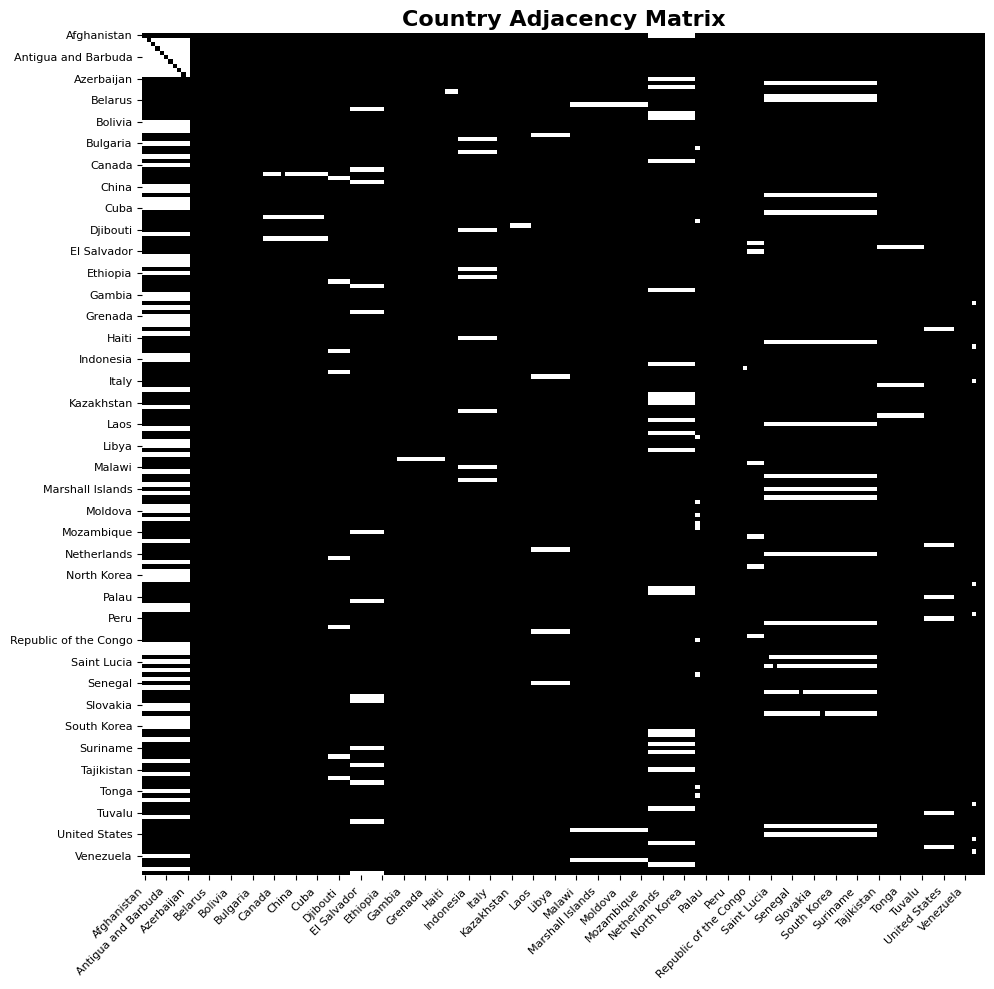

In [116]:
plot_adj_matrix(country_net, 5, 'Country')

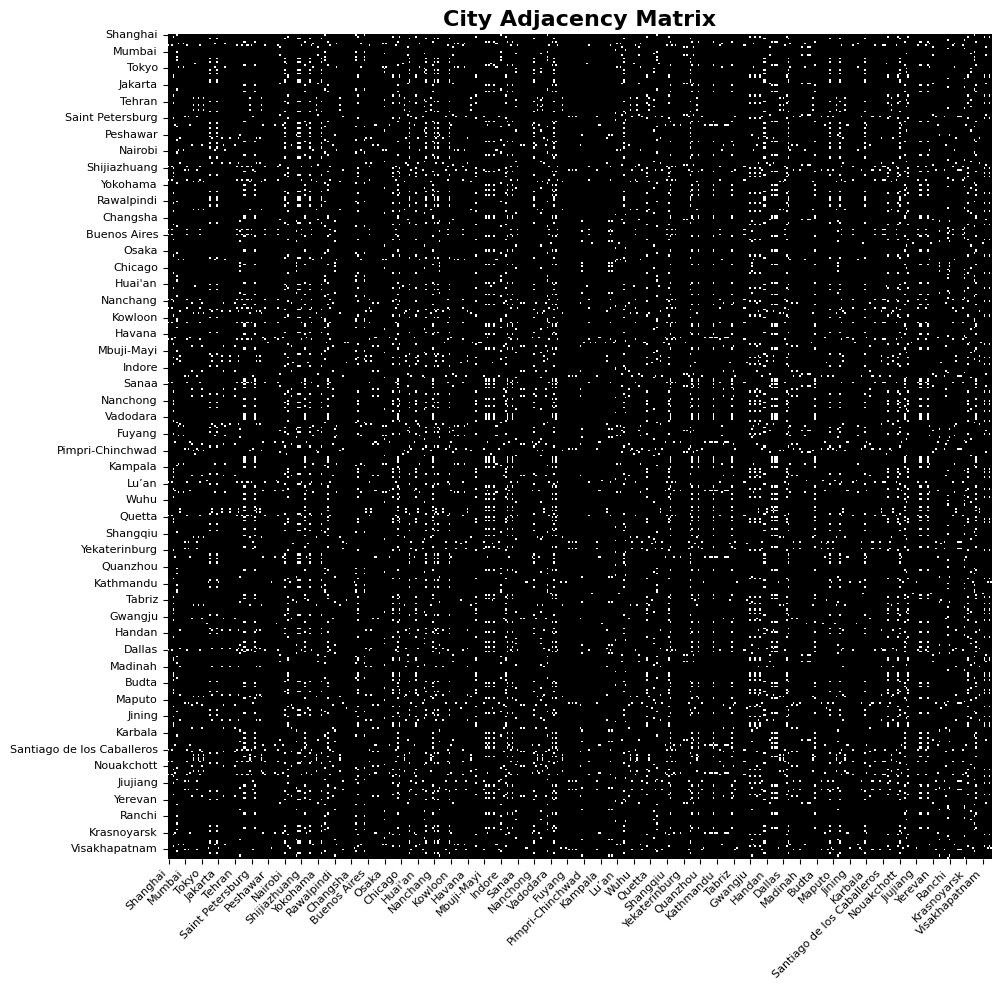

In [117]:
plot_adj_matrix(city_net, 10, "City")

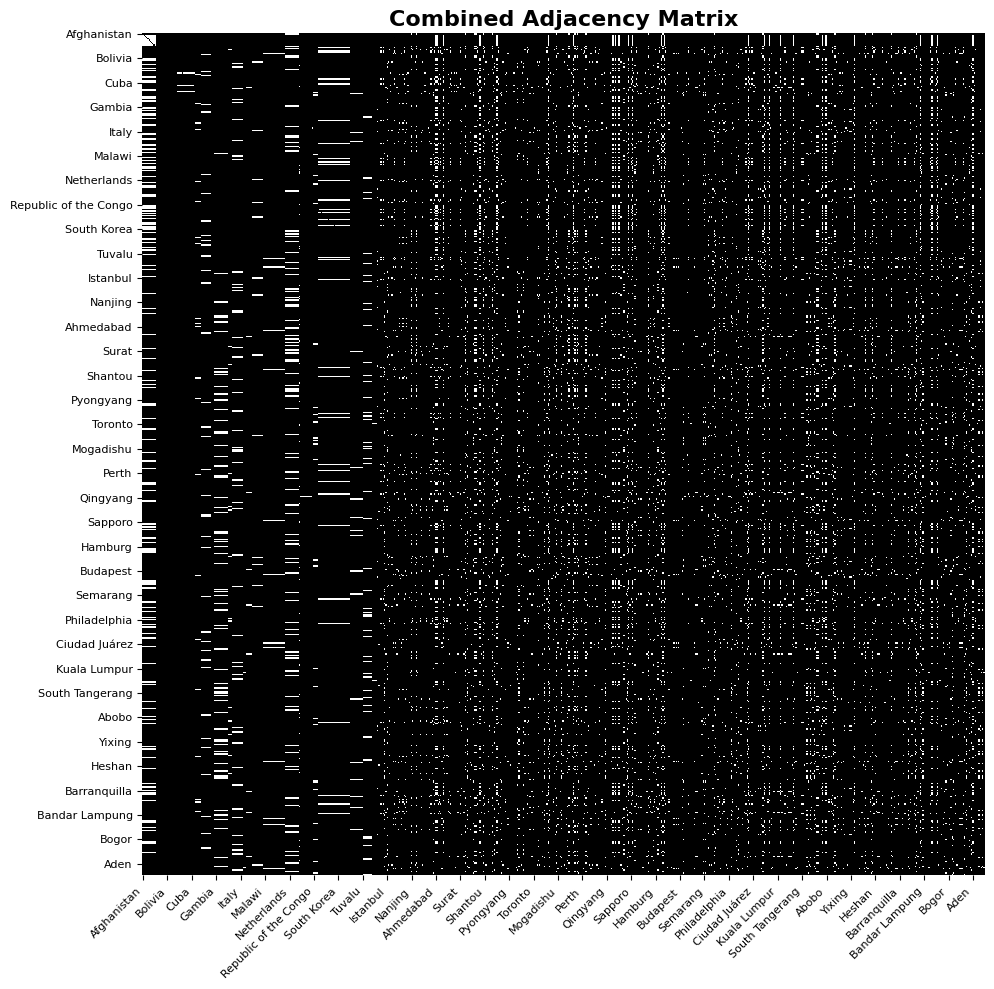

In [118]:
plot_adj_matrix(combined_net, 20, 'Combined')

In [ ]:
plot_adj_matrix(count)

## Degree Distributions

In [27]:
country_in = Counter(dict(country_net.in_degree()))
country_out = Counter(dict(country_net.out_degree()))
country_total = country_in + country_out
country_adv = country_out - country_in

city_in = Counter(dict(city_net.in_degree()))
city_out = Counter(dict(city_net.out_degree()))
city_total = city_in + city_out
city_adv = city_out - city_in

combined_in = Counter(dict(combined_net.in_degree()))
combined_out = Counter(dict(combined_net.out_degree()))
combined_total = combined_in + combined_out
combined_adv = combined_out - combined_in

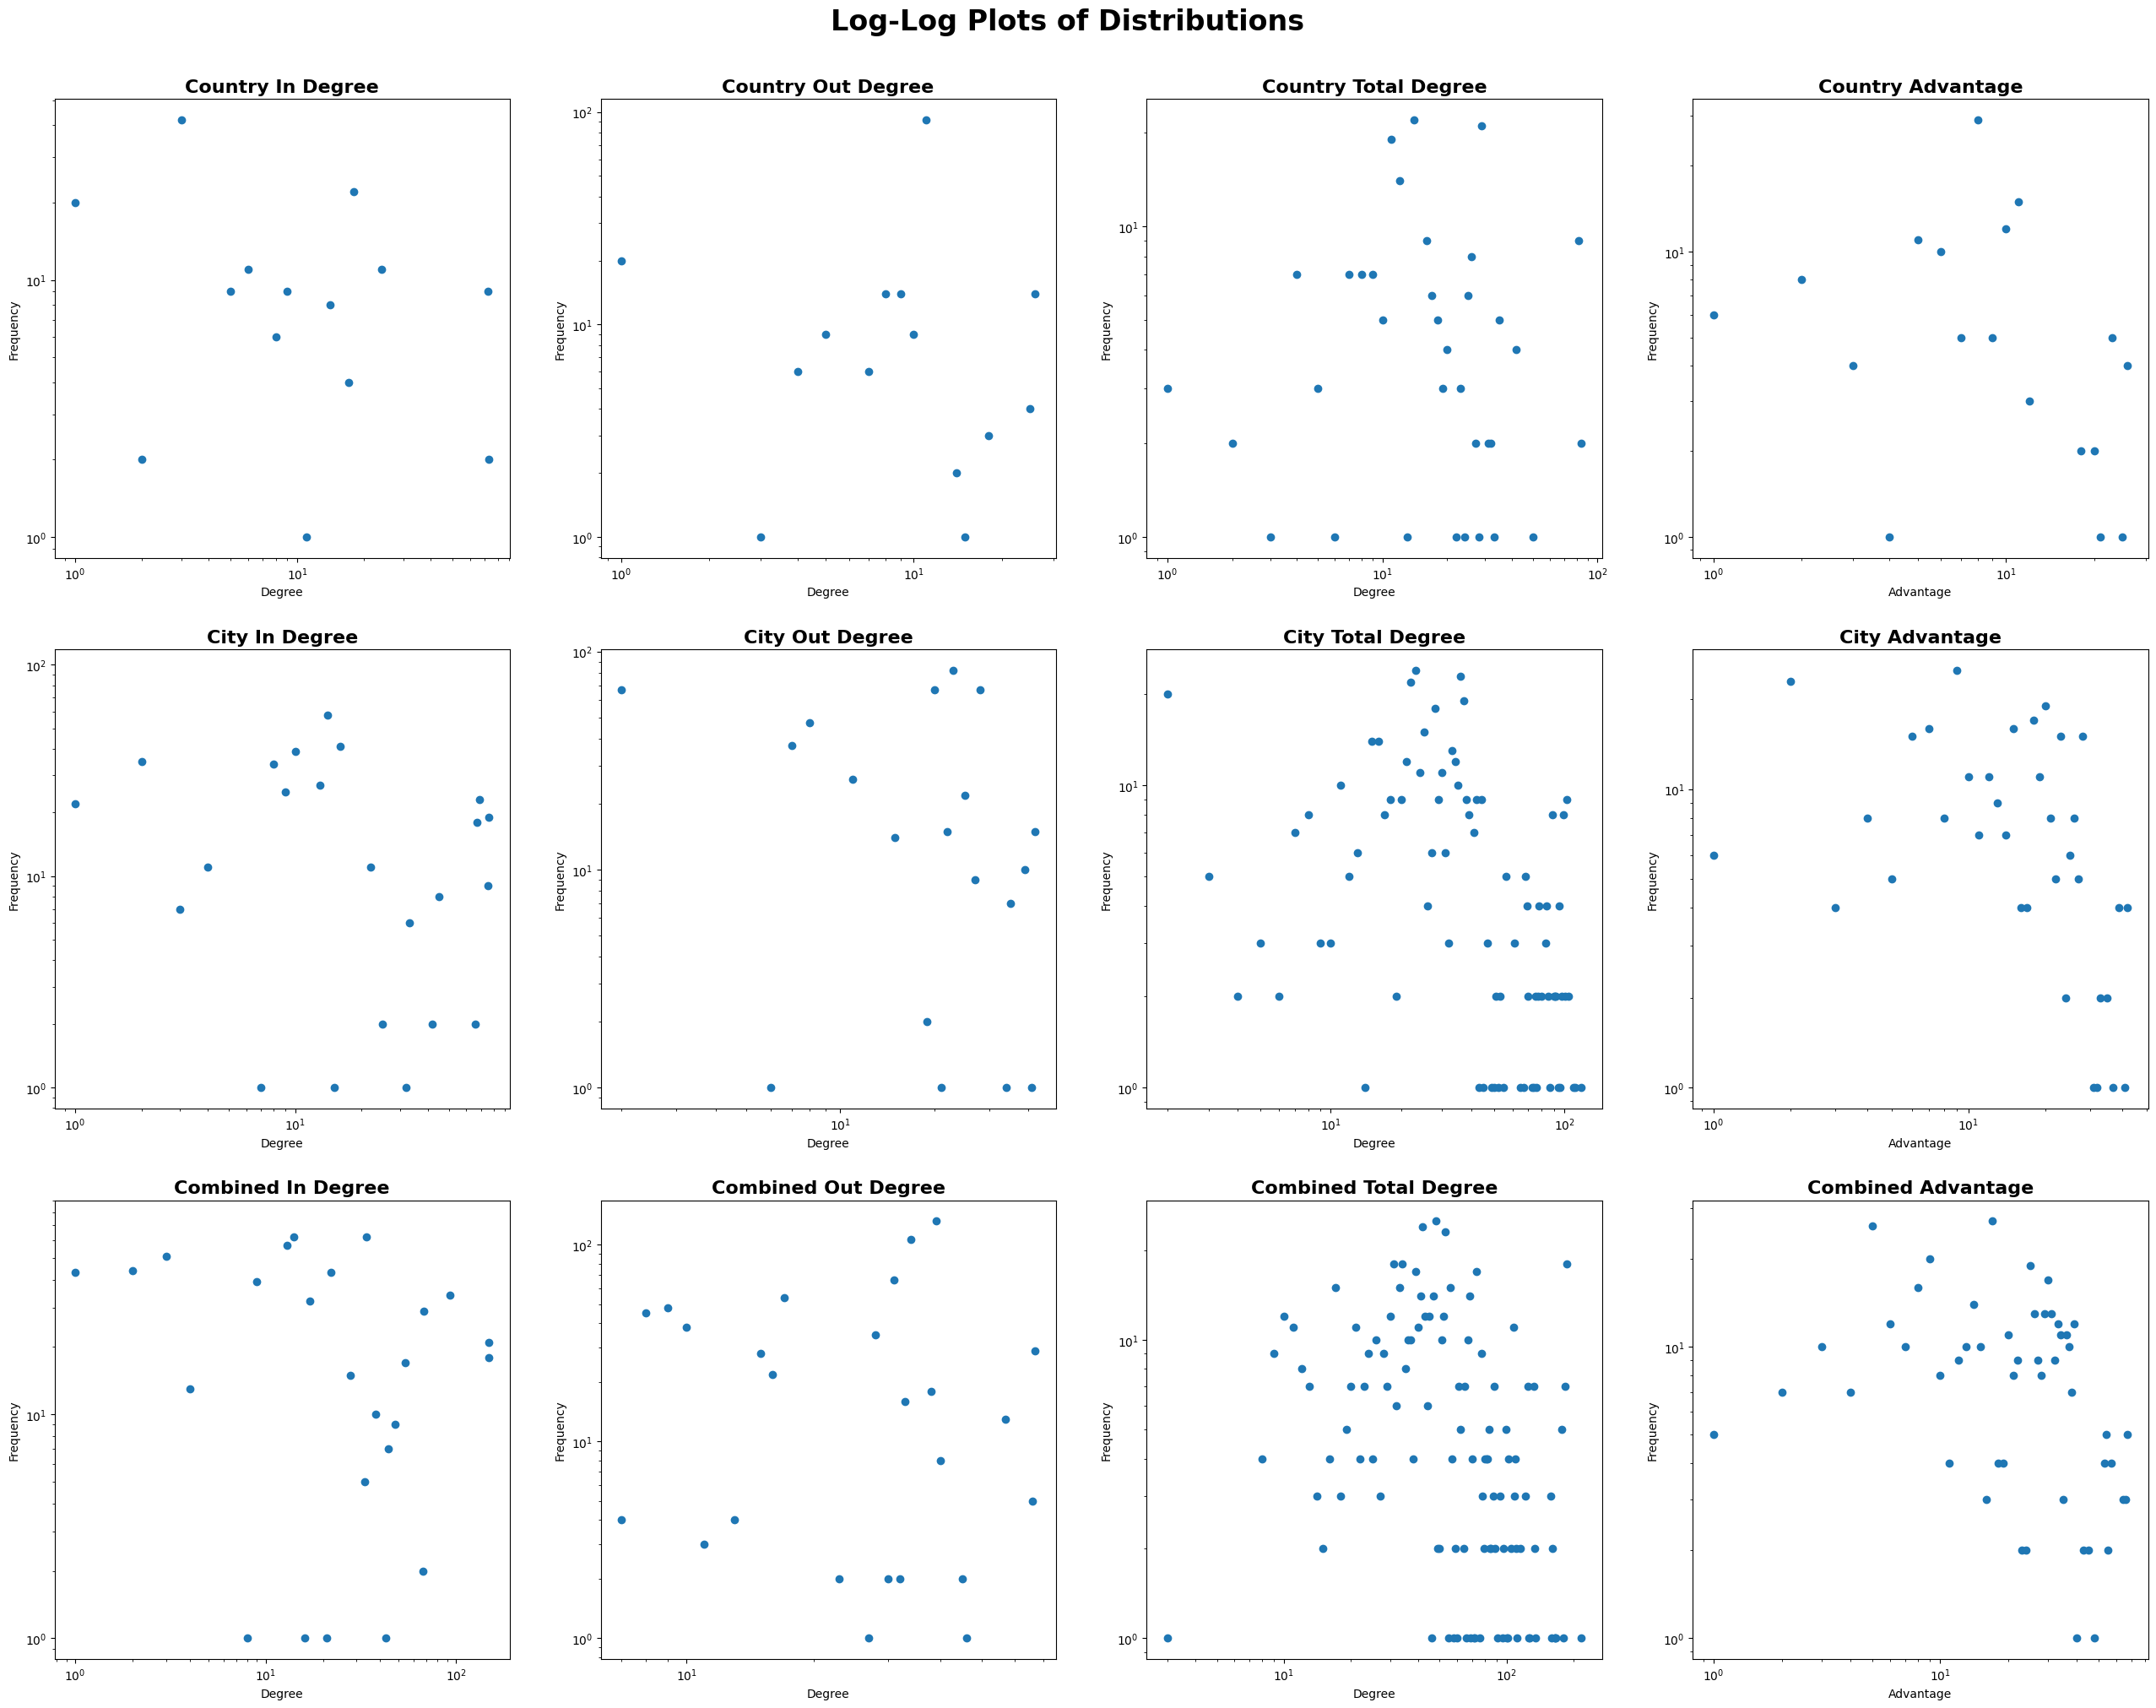

In [72]:
fig, ax = plt.subplots(3, 4, figsize=(32, 24))

for i in range(3):
    for j in range(4):
        ax[i,j].set_xscale("log")
        ax[i,j].set_yscale("log")

country_in_freq = Counter(country_in.values())
country_out_freq = Counter(country_out.values())
country_total_freq = Counter(country_total.values())
country_adv_freq = Counter(country_adv.values())

ax[0,0].scatter(country_in_freq.keys(), country_in_freq.values())
ax[0,1].scatter(country_out_freq.keys(), country_out_freq.values())
ax[0,2].scatter(country_total_freq.keys(), country_total_freq.values())
ax[0,3].scatter(country_adv_freq.keys(), country_adv_freq.values())

city_in_freq = Counter(city_in.values())
city_out_freq = Counter(city_out.values())
city_total_freq = Counter(city_total.values())
city_adv_freq = Counter(city_adv.values())

ax[1,0].scatter(city_in_freq.keys(), city_in_freq.values())
ax[1,1].scatter(city_out_freq.keys(), city_out_freq.values())
ax[1,2].scatter(city_total_freq.keys(), city_total_freq.values())
ax[1,3].scatter(city_adv_freq.keys(), city_adv_freq.values())

combined_in_freq = Counter(combined_in.values())
combined_out_freq = Counter(combined_out.values())
combined_total_freq = Counter(combined_total.values())
combined_adv_freq = Counter(combined_adv.values())

ax[2,0].scatter(combined_in_freq.keys(), combined_in_freq.values())
ax[2,1].scatter(combined_out_freq.keys(), combined_out_freq.values())
ax[2,2].scatter(combined_total_freq.keys(), combined_total_freq.values())
ax[2,3].scatter(combined_adv_freq.keys(), combined_adv_freq.values())

ax[0,0].set_title("Country In Degree", fontsize=16, fontweight="bold")
ax[0,1].set_title("Country Out Degree", fontsize=16, fontweight="bold")
ax[0,2].set_title("Country Total Degree", fontsize=16, fontweight="bold")
ax[0,3].set_title("Country Advantage", fontsize=16, fontweight="bold")

ax[1,0].set_title("City In Degree", fontsize=16, fontweight="bold")
ax[1,1].set_title("City Out Degree", fontsize=16, fontweight="bold")
ax[1,2].set_title("City Total Degree", fontsize=16, fontweight="bold")
ax[1,3].set_title("City Advantage", fontsize=16, fontweight="bold")

ax[2,0].set_title("Combined In Degree", fontsize=16, fontweight="bold")
ax[2,1].set_title("Combined Out Degree", fontsize=16, fontweight="bold")
ax[2,2].set_title("Combined Total Degree", fontsize=16, fontweight="bold")
ax[2,3].set_title("Combined Advantage", fontsize=16, fontweight="bold")

ax[0,0].set_xlabel("Degree")
ax[0,1].set_xlabel("Degree")
ax[0,2].set_xlabel("Degree")
ax[0,3].set_xlabel("Advantage")

ax[1,0].set_xlabel("Degree")
ax[1,1].set_xlabel("Degree")
ax[1,2].set_xlabel("Degree")
ax[1,3].set_xlabel("Advantage")

ax[2,0].set_xlabel("Degree")
ax[2,1].set_xlabel("Degree")
ax[2,2].set_xlabel("Degree")
ax[2,3].set_xlabel("Advantage")

ax[0,0].set_ylabel("Frequency")
ax[0,1].set_ylabel("Frequency")
ax[0,2].set_ylabel("Frequency")
ax[0,3].set_ylabel("Frequency")

ax[1,0].set_ylabel("Frequency")
ax[1,1].set_ylabel("Frequency")
ax[1,2].set_ylabel("Frequency")
ax[1,3].set_ylabel("Frequency")

ax[2,0].set_ylabel("Frequency")
ax[2,1].set_ylabel("Frequency")
ax[2,2].set_ylabel("Frequency")
ax[2,3].set_ylabel("Frequency")

fig.suptitle("Log-Log Plots of Distributions", fontsize=24, fontweight="bold", y=0.925)

plt.show()